# Essai d'implementation de l'active learning

In [1]:
import pandas as pd
from joblib import load
from preprocessor import *
from sklearn.model_selection import train_test_split

## Masquage des labels

In [2]:
# Chargement des donnees
data = pd.read_csv('/home/onyxia/work/PROJET_STATAPP/Data/Cleans/Data_for_active_learning.csv')
data.head(2)

,Unnamed: 0,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,FraudFound_P,...,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,delay_weeks
0,0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,more than 69000,0,...,more than 30,none,3 years,No,No,External,none,1 year,3 to 4,1
1,1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,more than 69000,0,...,more than 30,none,6 years,Yes,No,External,none,no change,1 vehicle,61


In [3]:
# Chargement des donnees non labelisees et des labels
no_labels_data = data.drop(columns=['FraudFound_P'])
labels = data['FraudFound_P']
no_labels_data.head(3)

,Unnamed: 0,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehiclePrice,Deductible,...,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,delay_weeks
0,0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,more than 69000,300,...,more than 30,none,3 years,No,No,External,none,1 year,3 to 4,1
1,1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,more than 69000,400,...,more than 30,none,6 years,Yes,No,External,none,no change,1 vehicle,61
2,2,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,more than 69000,400,...,more than 30,1,7 years,No,No,External,none,no change,1 vehicle,2


In [4]:
# Chargement du pipeline
preprocessor = load("preprocessor.joblib")

In [5]:
all_cols = binary_cols + label_cols + freq_cols + ordinal_cols + scale_cols # definit dans preprocessor.py
no_labels_data_preprocessed = preprocessor.fit_transform(no_labels_data)
no_labels_data_preprocessed = pd.DataFrame(no_labels_data_preprocessed, columns=all_cols)
no_labels_data_preprocessed.head(2)

,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,Make,MaritalStatus,PolicyType,VehiclePrice,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,DriverRating,Deductible,Age,delay_weeks
0,1.0,0.0,1.0,0.0,0.0,0.0,6.0,2.0,0.000065,5.0,4.0,0.0,2.0,0.0,2.0,2.0,1.0,300.0,-1.516574,-1.856357
1,1.0,1.0,1.0,1.0,0.0,0.0,6.0,2.0,0.022570,5.0,4.0,0.0,5.0,0.0,0.0,0.0,4.0,400.0,-0.489689,0.602140


## Separation des donnees

In [6]:
X_seed, X_pool, y_seed, y_pool = train_test_split(no_labels_data_preprocessed, labels, train_size=200, stratify=labels, random_state=42)

In [7]:
X_seed.head(2)

,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,Make,MaritalStatus,PolicyType,VehiclePrice,Days_Policy_Accident,PastNumberOfClaims,AgeOfVehicle,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,DriverRating,Deductible,Age,delay_weeks
7816,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.323432,2.0,4.0,2.0,6.0,0.0,0.0,0.0,2.0,400.0,0.616186,0.643115
10702,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.264998,5.0,4.0,2.0,6.0,1.0,0.0,0.0,3.0,400.0,0.458204,0.561165


## Entrainement preliminaire du modele

In [8]:
# Chargement du modele
lightgbm_model = load('/home/onyxia/work/PROJET_STATAPP/Notebooks/lgbm_untrained.joblib')

In [9]:
# fit du modele
lightgbm_model.fit(X_seed, y_seed)

[LightGBM] [Info] Number of positive: 12, number of negative: 188
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 200, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.060000 -> initscore=-2.751535
[LightGBM] [Info] Start training from score -2.751535
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,10
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


## Implementation de l'active learning

In [10]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    learning_rate=0.05,
    max_depth=10,
    n_estimators=300,
    random_state=42
)

In [11]:
import pandas as pd
import numpy as np

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    roc_auc_score,
    roc_curve
)

from imblearn.over_sampling import SMOTE

# -----------------------
# Tracking des résultats
# -----------------------
results = []

# SMOTE (TRAIN ONLY)
smote = SMOTE(sampling_strategy=0.25, random_state=42)

# -----------------------
# Boucle d'active learning
# -----------------------
while len(X_seed) < 10700:

    # ---- 1. SMOTE uniquement sur le seed ----
    X_seed_smote, y_seed_smote = smote.fit_resample(X_seed, y_seed)

    # ---- 2. Entraînement ----
    model.fit(X_seed_smote, y_seed_smote)

    # ---- 3. Évaluation sur le pool (sans SMOTE) ----
    y_pred = model.predict(X_pool)
    y_proba = model.predict_proba(X_pool)[:, 1]

    results.append({
        "labels_used": len(X_seed),
        "accuracy": accuracy_score(y_pool, y_pred),
        "f1": f1_score(y_pool, y_pred),
        "recall": recall_score(y_pool, y_pred),
        "precision": precision_score(y_pool, y_pred),
        "auc": roc_auc_score(y_pool, y_proba)
    })

    # ---- 4. Calcul de l'indice de Youden ----
    fpr, tpr, thresholds = roc_curve(y_pool, y_proba)
    youden = tpr - fpr
    best_idx = np.argmax(youden)
    youden_threshold = thresholds[best_idx]

    # Intervalle adaptatif de largeur ~0.95
    half_width = 0.95 / 2
    lower = max(0.01, youden_threshold - half_width)
    upper = min(0.99, youden_threshold + half_width)

    # ---- 5. Uncertainty sampling ----
    uncertain_mask = (y_proba > lower) & (y_proba < upper)
    uncertain_indices = X_pool.loc[uncertain_mask].index

    # Sécurité : aucun point incertain
    if len(uncertain_indices) == 0:
        print("Aucun point incertain → arrêt.")
        break

    # ---- 6. Ajout des points sélectionnés (données réelles) ----
    X_new = X_pool.loc[uncertain_indices]
    y_new = y_pool.loc[uncertain_indices]

    X_seed = pd.concat([X_seed, X_new])
    y_seed = pd.concat([y_seed, y_new])

    # ---- 7. Suppression du pool ----
    X_pool = X_pool.drop(uncertain_indices)
    y_pool = y_pool.drop(uncertain_indices)

    print(
        f"Iteration: {len(results)} | "
        f"Nouveaux labels: {len(uncertain_indices)} | "
        f"Total labels: {len(X_seed)} | "
        f"Youden threshold: {youden_threshold:.3f}"
    )

# -----------------------
# Résultats finaux
# -----------------------
results_df = pd.DataFrame(results)
results_df

[LightGBM] [Info] Number of positive: 47, number of negative: 188
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 175
[LightGBM] [Info] Number of data points in the train set: 235, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200000 -> initscore=-1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,labels_used,accuracy,f1,recall,precision,auc
0,200,0.915303,0.101742,0.080132,0.139313,0.657414
1,2997,0.945741,0.089189,0.051643,0.326733,0.800405
2,7356,0.981645,0.204301,0.119497,0.703704,0.865017
3,9310,0.993616,0.480000,0.352941,0.750000,0.880994
4,9654,0.995490,0.580645,0.450000,0.818182,0.916393
5,9754,0.995234,0.571429,0.461538,0.750000,0.904528
6,9854,0.995148,0.571429,0.461538,0.750000,0.898517
7,9875,0.995491,0.590164,0.461538,0.818182,0.895433
8,9897,0.995473,0.590164,0.461538,0.818182,0.915721
9,9933,0.995808,0.610169,0.486486,0.818182,0.915412


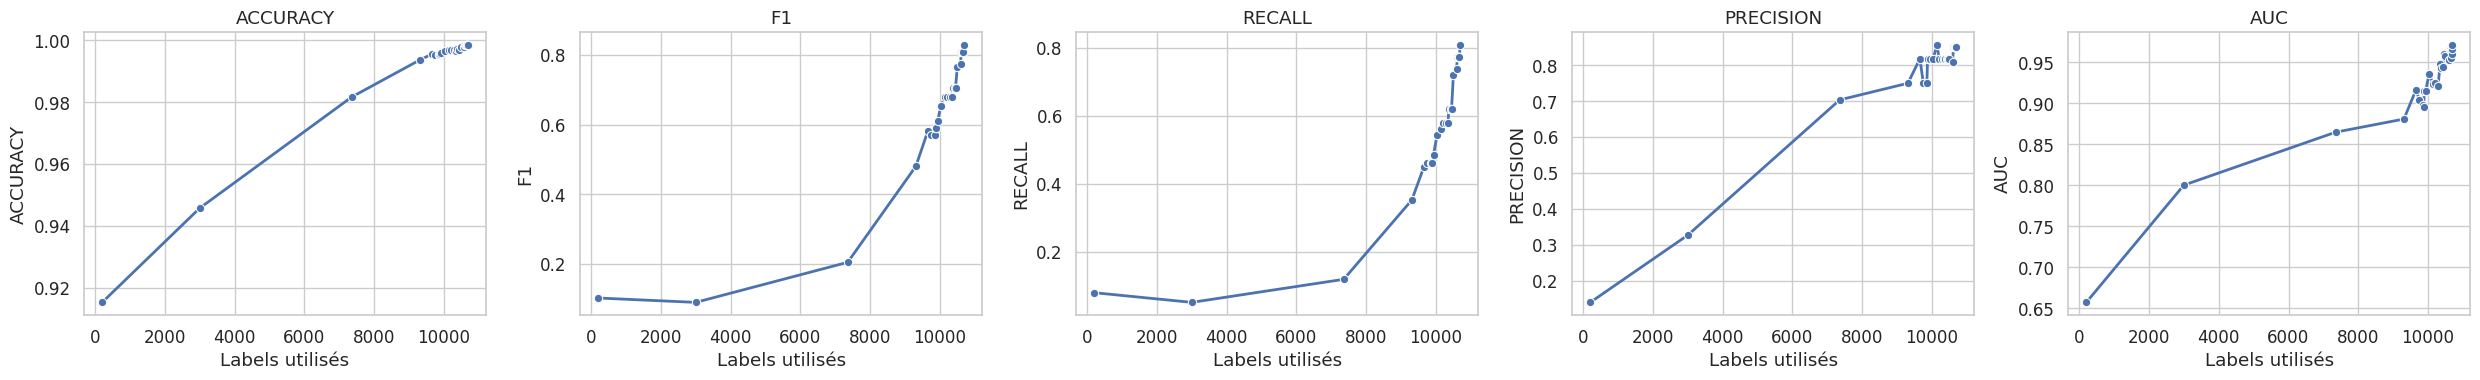

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Style seaborn
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.1)

metrics = ["accuracy", "f1", "recall", "precision", "auc"]
n_metrics = len(metrics)

# Déterminer nombre de colonnes pour 2 lignes
n_rows = 1
n_cols = math.ceil(n_metrics / n_rows)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), sharex=True)

# Aplatir axes si nécessaire
axes = axes.flatten()

for i, m in enumerate(metrics):
    ax = axes[i]
    sns.lineplot(
        x=results_df["labels_used"],
        y=results_df[m],
        marker="o",
        linewidth=2,
        ax=ax
    )
    ax.set_title(m.upper())
    ax.set_xlabel("Labels utilisés")
    ax.set_ylabel(m.upper())

# Supprimer les axes vides si n_metrics < n_rows * n_cols
for j in range(n_metrics, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
